In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')       # setting the background of graphs 
%matplotlib inline

In [9]:
# DataReader is used to access various data sources from the internet.
# Popularly used for working with realtime stock price datasets.
# I have to first install pandas_datareader

import pandas_datareader as pdr

In [10]:
# to work with datetime analysis

from datetime import datetime

In [11]:
# We created a list of stock names of diff companies
# AAPL - APPLE
# GOOG - GOOGLE
# MSFT - MICROSOFT
# AMZN - AMAZON

tech_stock_names = ['AAPL','GOOG','MSFT','AMZN']

In [12]:
# setting time for which we want stock prices

end = datetime.now()                                 # to get current date
start = datetime(end.year-1,end.month,end.day)       # to get date one year ago    

In [17]:
# pdr.DataReader(name of stock,source of data, start date, end date)
# globals will set name of stock as dataframe name

for stock in tech_stock_names:
    globals()[stock] = pdr.DataReader(stock,'yahoo',start,end)     
                                                               

High - max price of stock on the day. 
Low - min price of the stock on the day. Open - price when stock is opened that day.
Close - price when stock is closed that day. 
Volume - number of share trades. 
Adj Close - adjusted closing price of stock

In [18]:
# we can access the data frame just by the name 

AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,149.571915
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,149.939774
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.066437
2021-11-11,149.429993,147.679993,148.960007,147.869995,41000000.0,147.016754
2021-11-12,150.399994,147.479996,148.429993,149.990005,63804000.0,149.124542


In [19]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-08 to 2022-11-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

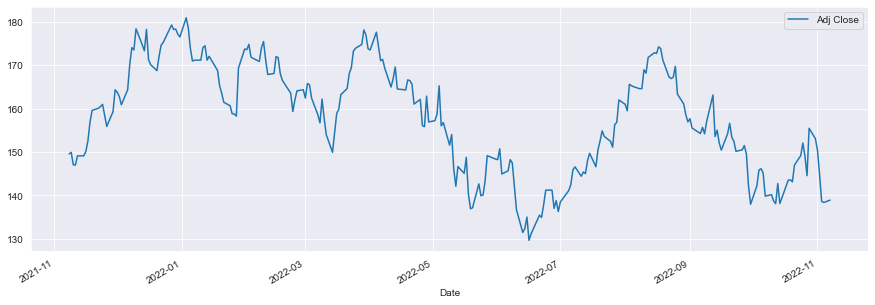

In [21]:
AAPL['Adj Close'].plot(legend=True, figsize=(15,5))

We are going to create moving average column for Adj Close price.
Moving Average is a concept of stock analysis. we define a time frame such as 100 days, average will be calculated for first 100 days, then as the 101 day is added it will count the average from 2 day to 101 day. 
So moving average will drop the oldest day and add the newest day while calculating the average. Thus the average will move.

In [26]:
MA_list = [20,40,60]

for ma in MA_list:
    col_name = "MA for %s days" %(str(ma))                          # entering variable in string
    AAPL[col_name] = AAPL['Adj Close'].rolling(ma).mean()
    
# rolling mean function will calculate the rolling average.

In [30]:
AAPL[['Adj Close','MA for 20 days','MA for 40 days','MA for 60 days']]

,Adj Close,MA for 20 days,MA for 40 days,MA for 60 days
Date,,,,
2021-11-08,149.571915,NaN,NaN,NaN
2021-11-09,149.939774,NaN,NaN,NaN
2021-11-10,147.066437,NaN,NaN,NaN
2021-11-11,147.016754,NaN,NaN,NaN
2021-11-12,149.124542,NaN,NaN,NaN
...,...,...,...,...
2022-11-01,150.400497,145.128251,148.271286,154.138804
2022-11-02,144.789810,145.059865,147.998489,153.807853
2022-11-03,138.650009,144.732908,147.609634,153.302691


<AxesSubplot:xlabel='Date'>

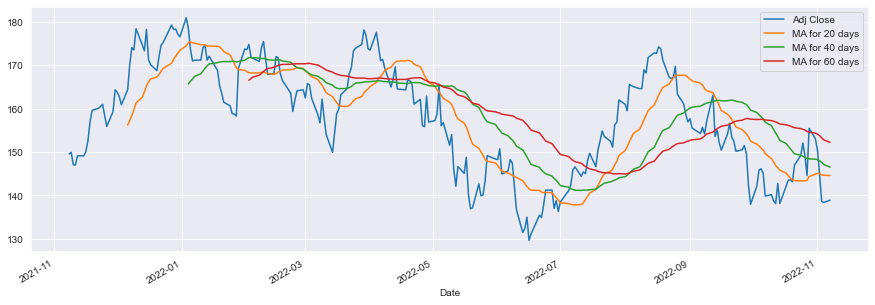

In [34]:
AAPL[['Adj Close','MA for 20 days','MA for 40 days','MA for 60 days']].plot(subplots=False,figsize=(15,5))

In [36]:
# calculating the % change 

AAPL['% Return'] = AAPL['Adj Close'].pct_change()
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 20 days,MA for 40 days,MA for 60 days,% Return
Date,,,,,,,,,,
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,149.571915,NaN,NaN,NaN,NaN
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,149.939774,NaN,NaN,NaN,0.002459
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.066437,NaN,NaN,NaN,-0.019163
2021-11-11,149.429993,147.679993,148.960007,147.869995,41000000.0,147.016754,NaN,NaN,NaN,-0.000338
2021-11-12,150.399994,147.479996,148.429993,149.990005,63804000.0,149.124542,NaN,NaN,NaN,0.014337


<AxesSubplot:title={'center':'Daily Return'}, xlabel='Date'>

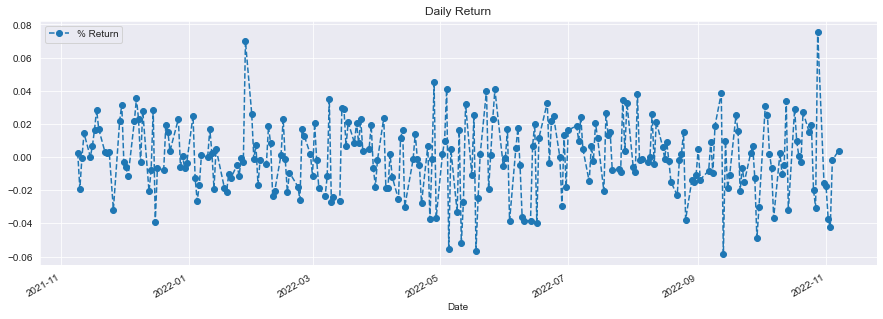

In [37]:
AAPL['% Return'].plot(legend=True,figsize=(15,5),linestyle='--',marker="o",title="Daily Return")

F:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='% Return', ylabel='Density'>

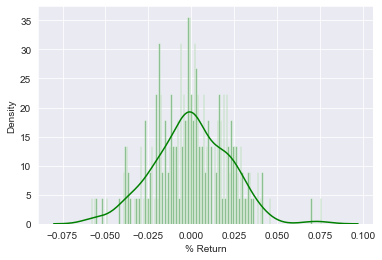

In [38]:
sns.distplot(AAPL['% Return'].dropna(),bins=150,color='green')

<AxesSubplot:>

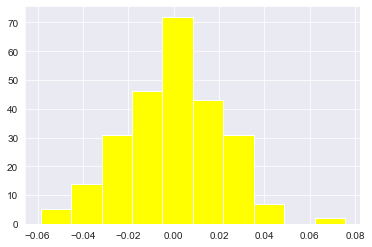

In [41]:
AAPL['% Return'].hist(color='yellow')

In [42]:
closing_prices = pdr.DataReader(tech_stock_names,'yahoo',start,end)['Adj Close']
closing_prices.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-08,149.571915,149.351501,334.191101,174.449005
2021-11-09,149.939789,149.248505,333.159790,178.811493
2021-11-10,147.066452,146.626007,328.052521,174.102493
2021-11-11,147.016754,146.748001,329.669006,173.625000
2021-11-12,149.124527,149.645493,333.923401,176.257507


In [43]:
tech_returns = closing_prices.pct_change()
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-08,NaN,NaN,NaN,NaN
2021-11-09,0.002460,-0.000690,-0.003086,0.025007
2021-11-10,-0.019163,-0.017571,-0.015330,-0.026335
2021-11-11,-0.000338,0.000832,0.004928,-0.002743
2021-11-12,0.014337,0.019745,0.012905,0.015162


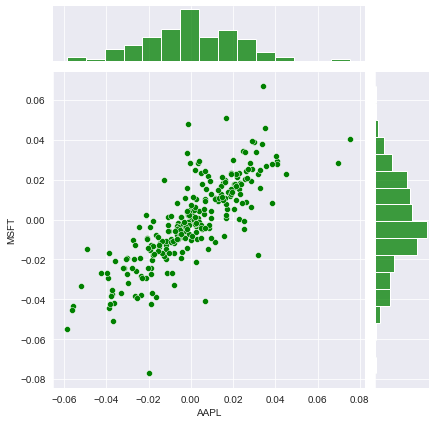

In [44]:
sns.jointplot(x='AAPL',y='MSFT',data=tech_returns,kind='scatter',color='green')

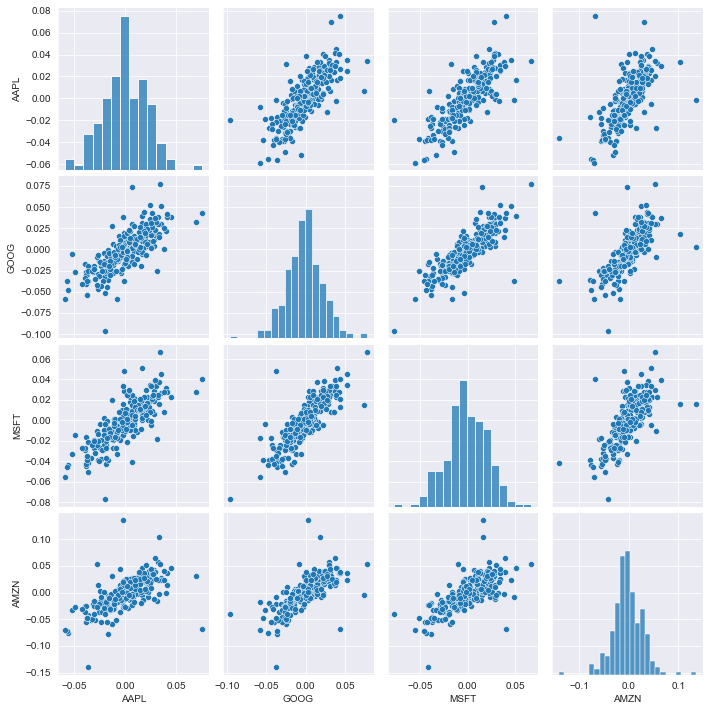

In [51]:
sns.pairplot(data=tech_returns,dropna=True)

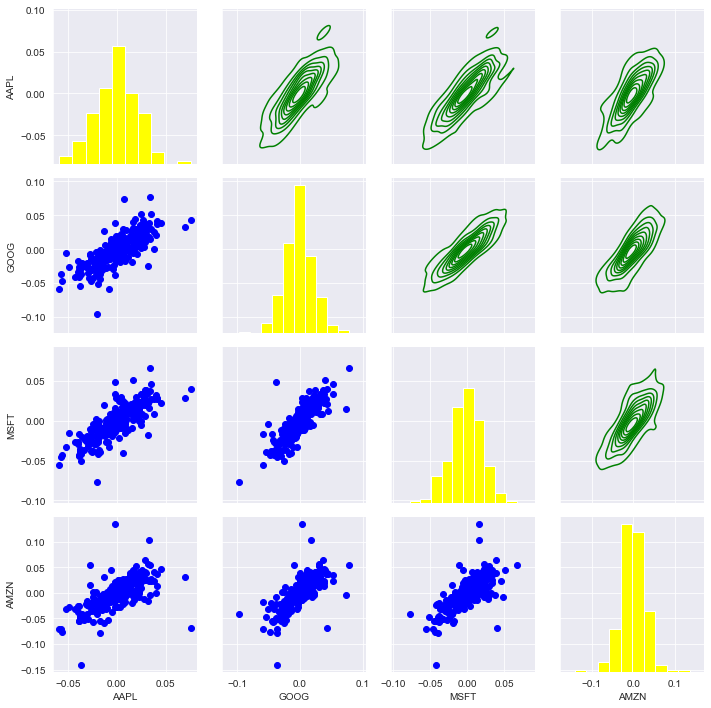

In [56]:
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_lower(plt.scatter,color='blue')

returns_fig.map_upper(sns.kdeplot,color='green')

returns_fig.map_diag(plt.hist,bins=10,color='yellow')

Co-relation between daily returns for diff tech compnies

There is strong co-relation between google and microsoft

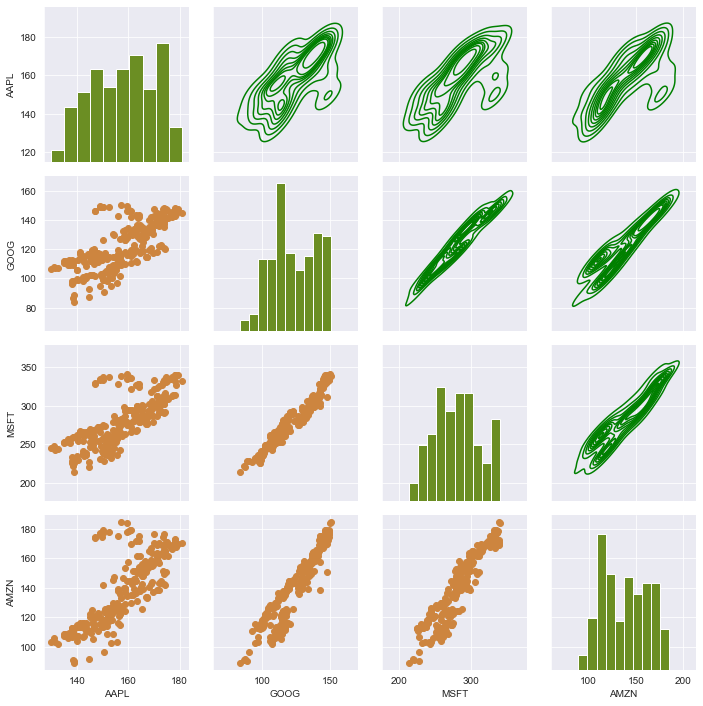

In [60]:
returns_fig = sns.PairGrid(closing_prices)

returns_fig.map_lower(plt.scatter,color='peru')

returns_fig.map_upper(sns.kdeplot,color='green')

returns_fig.map_diag(plt.hist,bins=10,color='olivedrab')

Co-relation between closing price sof different tech companies

There is a strong co-relation in closing prices of microsoft and google.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

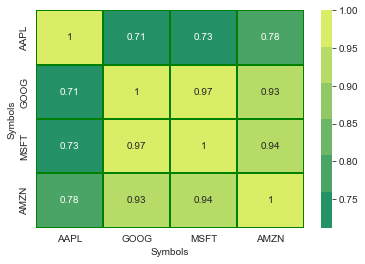

In [71]:
clr = sns.color_palette(palette='summer')                            #used to create colors
sns.heatmap(closing_prices.corr(),cmap=clr,annot=True,linewidth=2,linecolor='green')   #linewidth and linecolor is for outlining

As we see in the pairplot there is higher co-relation in google and microsoft and that is confirmed by heatmap.

In [72]:
tech_returns_1 = tech_returns.dropna()

In [76]:
area = np.pi*20
area

62.83185307179586

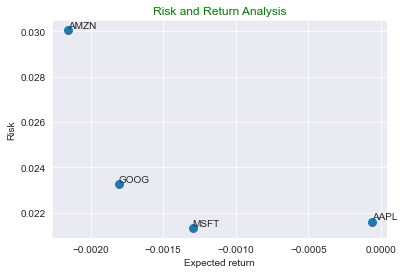

In [90]:
plt.scatter(x=tech_returns_1.mean(),y=tech_returns_1.std(),s=area)
plt.title('Risk and Return Analysis',fontdict={'color': 'green'})
plt.xlabel('Expected return')
plt.ylabel('Risk')

for text,x,y in zip(tech_returns_1.columns,tech_returns_1.mean(),tech_returns_1.std()):
    plt.annotate(text,xy=(x,y),ha='left',va='bottom')

Lower the risk and higher the return, we will choose.

Apple stocks are good to invest as it has higher returns (less negative) and lower risk as compared to other compnies.